# Heart Disease Analysis

This notebook explores a heart disease dataset to understand patient characteristics
and identify patterns associated with the presence of heart disease. The goal of this
analysis is to gain insights through data understanding and exploratory data analysis
before applying any machine learning techniques.


## Dataset Overview

The dataset contains medical attributes related to patient health, including both
numerical and categorical features. Each record represents a patient, and the target
variable indicates whether the patient has heart disease or not.


## Objective

The objective of this analysis is to explore the dataset, understand the structure and
distribution of features, and identify relationships between patient attributes and
heart disease. This step focuses only on data understanding and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Target Variable

The target variable in this dataset is `target`:
- `0` indicates no presence of heart disease
- `1` indicates presence of heart disease


In [4]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

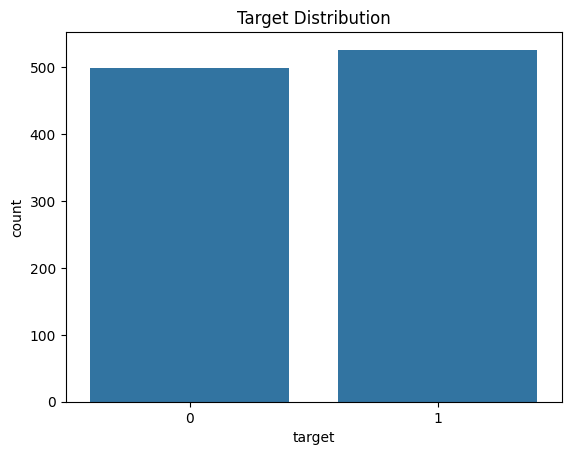

In [5]:
sns.countplot(x='target',data=df)
plt.title('Target Distribution')
plt.show

## Initial Data Inspection

Initial inspection was performed to examine the shape of the dataset, column names,
data types, and basic summary statistics. This step helps in understanding the overall
structure and identifying any immediate data quality issues.


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Quality Check

A basic data quality check was conducted to verify the presence of missing or invalid
values. The dataset does not show critical missing values that would affect exploratory
analysis at this stage.


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Distribution of Heart Disease

This section visualizes the distribution of the target variable to understand the
proportion of patients with and without heart disease.


<function matplotlib.pyplot.show(close=None, block=None)>

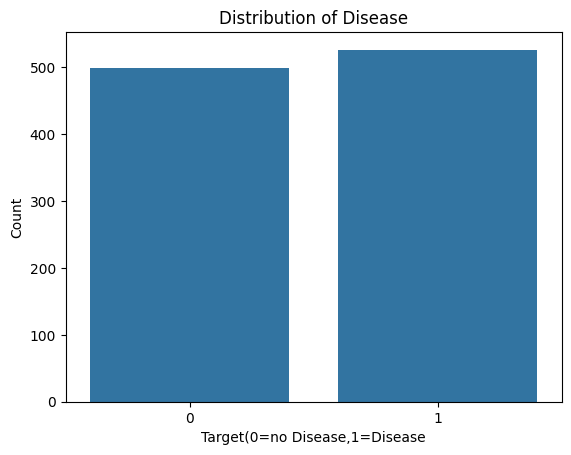

In [9]:
plt.figure()
sns.countplot(x='target',data=df)
plt.title('Distribution of Disease')
plt.xlabel('Target(0=no Disease,1=Disease')
plt.ylabel('Count')
plt.show

- The target variable represents the presence or absence of heart disease.
- The distribution shows how balanced the dataset is between disease and non-disease cases.


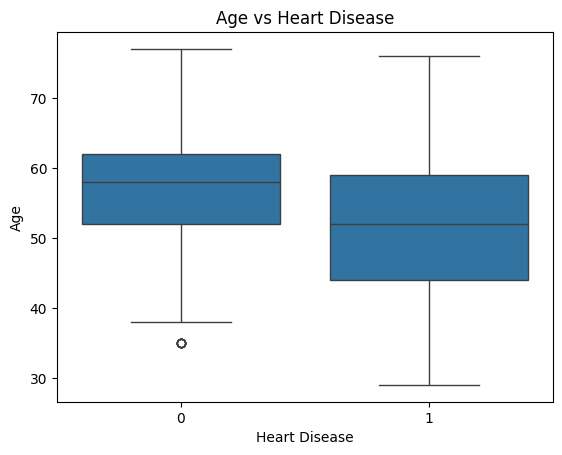

In [10]:
plt.figure()
sns.boxplot(x='target',y='age',data=df)
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

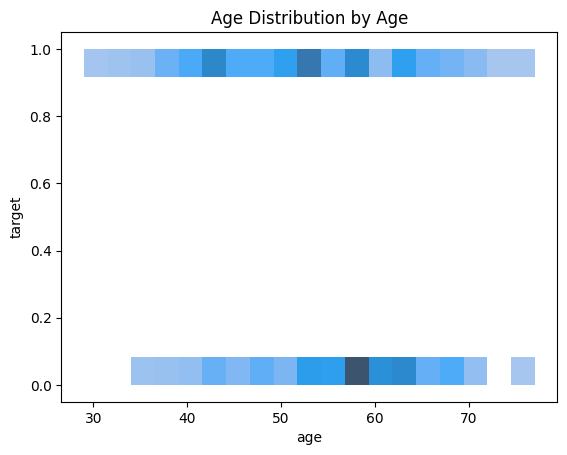

In [11]:
plt.figure()
sns.histplot(data=df,x='age',y='target',multiple='stack')
plt.title('Age Distribution by Age')
plt.show()

### Age vs Heart Disease

The age distribution shows a clear difference between patients with and without heart disease.
Patients without heart disease are mostly concentrated in the younger and middle-age groups,
while patients with heart disease are more common in higher age ranges, especially above 50 years.
This indicates that age is an important risk factor for heart disease.


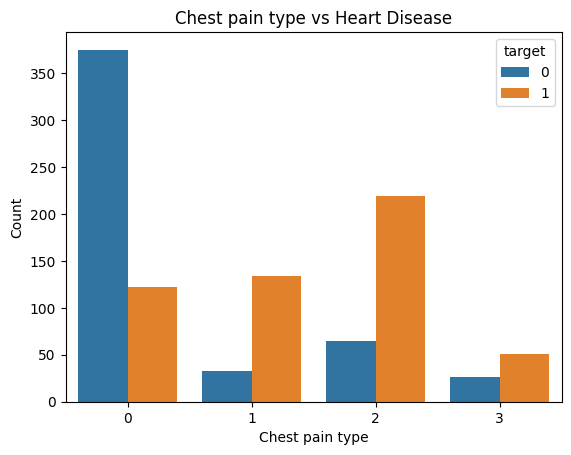

In [12]:
plt.figure()
sns.countplot(x='cp',hue='target',data=df)
plt.title('Chest pain type vs Heart Disease')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.show()

- Certain chest pain types are strongly associated with heart disease.
- Some pain categories are more common in non-disease patients.


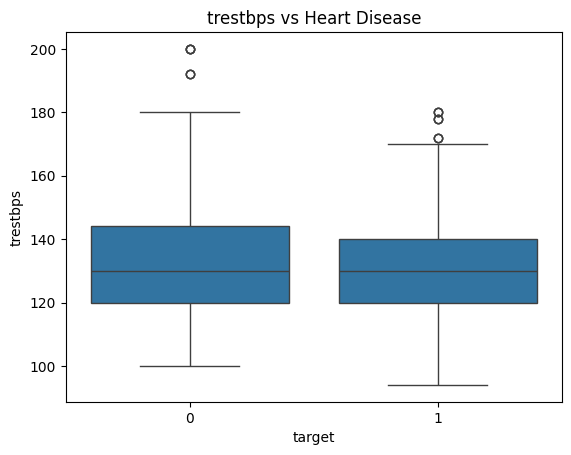

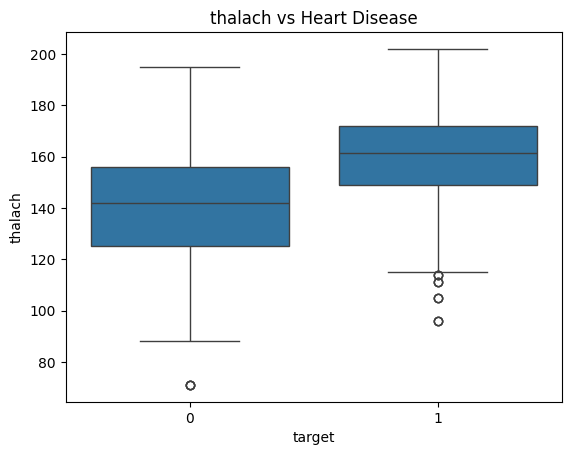

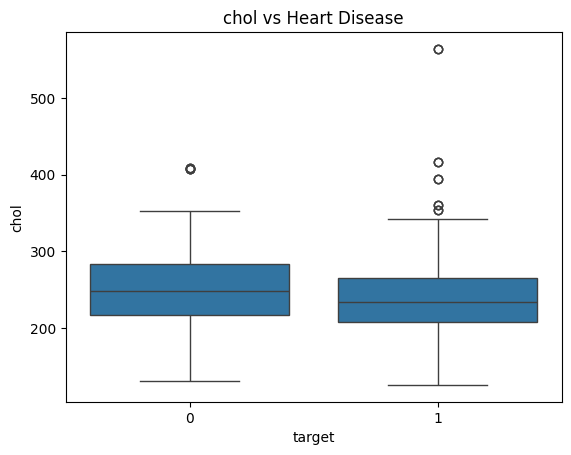

In [13]:
num_features=['trestbps','thalach','chol']
for col in num_features:
    plt.figure()
    sns.boxplot(data=df,x='target',y=col)
    plt.title(f'{col} vs Heart Disease')
    plt.show()

- Maximum heart rate (`thalach`) shows a clear difference between patients with and without disease.
- Cholesterol and resting blood pressure vary across both groups.


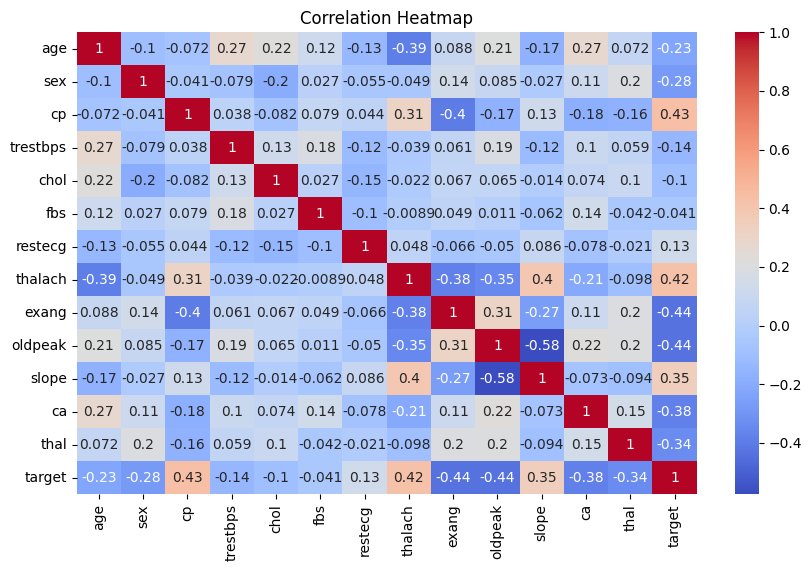

In [14]:
plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Age, maximum heart rate, and chest pain type show strong correlation with heart disease.
- Some features are correlated with each other, indicating potential multicollinearity.


## Conclusion Day 1

The dataset was explored to understand its structure, features, and target variable
related to heart disease presence. Exploratory analysis revealed meaningful relationships
between patient characteristics and heart disease, particularly with respect to age,
chest pain type, and key numerical features. Correlation analysis highlighted important
feature relationships that may influence prediction. These insights provide a strong
foundation for feature engineering, preprocessing, and model development in later stages.


## Day 2: Feature Engineering and Preprocessing

In this step, the dataset is prepared for machine learning by transforming it into a
numerical and standardized format. Proper preprocessing is essential to ensure that
machine learning models can learn effectively from the data and produce reliable results.


### Feature–Target Separation

The target variable representing the presence of heart disease is separated from the
feature set. This step ensures that the models learn patterns only from input features
and prevents data leakage during training and evaluation.


In [15]:
x=df.drop('target',axis=1,)
y=df['target']
x.shape,y.shape

((1025, 13), (1025,))

### Encoding and Scaling

Categorical features are converted into numerical values using label encoding, as machine
learning algorithms require numerical inputs. Numerical features are scaled to bring all
values to a similar range, ensuring balanced feature contribution and improved model
performance.


In [16]:
categorical_cols=x.select_dtypes(include=['object']).columns
numerical_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols,numerical_cols

(Index([], dtype='object'),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal'],
       dtype='object'))

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_cols:
    x[col]=le.fit_transform(x[col])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[numerical_cols]=scaler.fit_transform(x[numerical_cols])

In [19]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


## Conclusion

In this step, the dataset was successfully prepared for machine learning. The target
variable was separated from the feature set to ensure proper model training. Features
were classified into categorical and numerical types, allowing appropriate preprocessing
methods to be applied. Categorical features were encoded into numerical form, and
numerical features were scaled to ensure uniform contribution across variables. These
preprocessing steps are essential for improving model accuracy, stability, and overall
performance. The dataset is now fully ready for model building and evaluation.


## Model Building and Evaluation

In this step, machine learning models are trained to predict the presence of heart
disease using the preprocessed dataset. Model performance is evaluated using appropriate
classification metrics to determine how well each model performs.


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
x_train.shape,x_test.shape

((820, 13), (205, 13))

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy:',accuracy_score(y_test,y_pred_lr))
print('\nClassicfication Report:\n',classification_report(y_test,y_pred_lr))

Accuracy: 0.7951219512195122

Classicfication Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



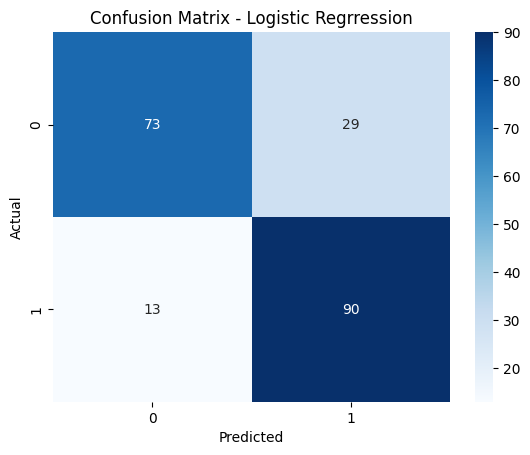

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_lr)
plt.figure()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regrression')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [25]:
print('Accuracy:',accuracy_score(y_test,y_pred_rf))
print('\nClassification Report:\n',classification_report(y_test,y_pred_rf))

Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



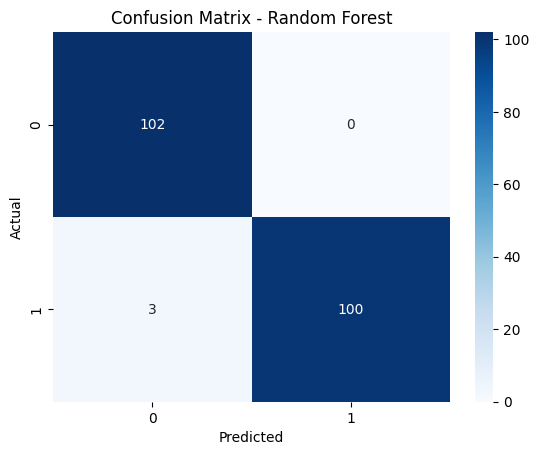

In [26]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
plt.figure()
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Model Performance Summary

The Logistic Regression model achieved an accuracy of approximately 79.5%, serving as a
strong baseline with high recall for heart disease cases. The Random Forest model
significantly outperformed the baseline, achieving an accuracy of approximately 98.5%
with near-perfect precision, recall, and F1-scores across both classes. The high recall
for heart disease cases makes the Random Forest model particularly suitable for this
medical classification task.


## Day 3 conclusion

The dataset was successfully transformed into a machine-learning-ready format through
encoding and scaling. Multiple models were trained and evaluated to predict heart disease,
with Random Forest demonstrating superior performance. These results highlight the
effectiveness of ensemble-based models for heart disease prediction and provide a strong
foundation for further validation and optimization.


## Final Day: Model Validation and Interpretation

The objective of the final day is to validate the trained model for robustness and
interpret its predictions. Cross-validation is used to ensure consistent performance,
and feature importance analysis is performed to understand which features contribute
most to heart disease prediction.


In [27]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(
    rf,x,y,cv=5,scoring='accuracy'
)
cv_scores,cv_scores.mean()

(array([1.        , 1.        , 1.        , 1.        , 0.98536585]),
 np.float64(0.9970731707317073))

In [28]:
import pandas as pd
feature_importance=pd.DataFrame({
    'Feature':x.columns,
    'Importance':rf.feature_importances_
}).sort_values(by='Importance',ascending=False)
feature_importance.head(10)

,Feature,Importance
2,cp,0.135072
11,ca,0.127327
7,thalach,0.122169
9,oldpeak,0.121905
12,thal,0.110518
0,age,0.077908
4,chol,0.074822
3,trestbps,0.071171
8,exang,0.057594
10,slope,0.045782


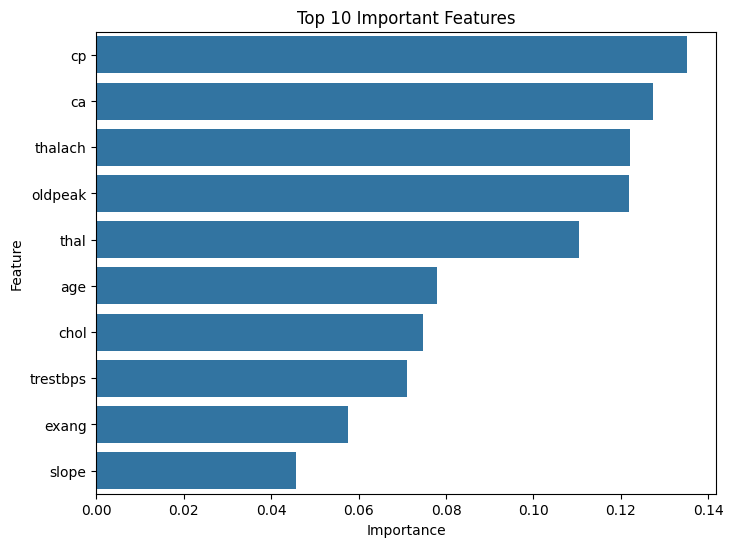

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title('Top 10 Important Features')
plt.show()

### Feature Importance Analysis

Feature importance analysis highlights the most influential variables used by the
Random Forest model for prediction. Features related to age, chest pain type, and heart
rate show higher importance, which aligns well with known medical risk factors. This
improves model interpretability and builds confidence in the predictions.


### Key Findings

- The Random Forest model demonstrates strong and consistent performance across
  cross-validation folds.
- A small subset of features contributes significantly to prediction accuracy.
- The identified important features align with established medical knowledge,
  validating the model’s behavior.


## Final Conclusion

This project successfully applied machine learning techniques to predict heart disease
using structured medical data. After preprocessing and model training, the Random Forest
classifier achieved excellent performance and demonstrated strong generalization through
cross-validation. Feature importance analysis enhanced interpretability and confirmed
clinically relevant patterns. Overall, the project presents a reliable and well-validated
approach to heart disease prediction and demonstrates the practical application of
machine learning in healthcare analytics.
